In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import time

# read files

In [ ]:
inputs = pd.read_pickle("/content/Sampled_inputs1.pck")
labels = pd.read_pickle("/content/Sampled_labels1.pck")

In [ ]:
len(inputs)

2310

In [ ]:
inputs.shape

(2310, 60, 33)

# check NAN

In [ ]:
if np.isnan(inputs).any():
  print('oops')

In [ ]:
len(labels)

2310

# classes distribution

In [ ]:
from collections import Counter
label_count = Counter(labels)
label_count

Counter({0: 385, 1: 770, 2: 385, 3: 385, 4: 385})

# generate binary labels

In [ ]:
labels = np.where(labels == 0, 1, labels)

labels = np.where(((labels == 2)|(labels ==3)|(labels ==4)), 0, labels)
print(labels)

[1 1 1 ... 0 0 0]


# balanced dataset

In [ ]:
from collections import Counter
label_count = Counter(labels)
label_count

Counter({0: 1155, 1: 1155})

# data prepare: transpose

In [ ]:
inputs = inputs.transpose(0,2,1)
inputs.shape

(2310, 33, 60)

# feature selection for univariate time sereies classification

In [ ]:
#return the i-th feature as input 
def feature_select(input,i):
  feature = input[:,i,:]
  feature = feature.reshape(feature.shape[0],1,feature.shape[1])
  return feature

# train, test split and z-normalize

In [ ]:
#train_test split and normalize
def data_prepare(inputs, labels):
  X_train, X_test, y_train, y_test = train_test_split(inputs, labels, random_state=42)
  X_train_mean = X_train.mean()
  X_train_std = X_train.std()
  X_train = (X_train - X_train_mean)/X_train_std
  X_test = (X_test - X_train_mean)/X_train_std
  return X_train, X_test, y_train, y_test


In [ ]:
! pip install sktime



#1-NN with DTW univariate (check the micro f1 score)

In [ ]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="dtw")
f1 = []
for i in range(33):
  data = feature_select(inputs,i)
  X_train, X_test, y_train, y_test = data_prepare(data, labels)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  f1.append(f1_score(y_test, y_pred,average='micro'))
print(f1)

[0.8010380622837369, 0.828719723183391, 0.8166089965397924, 0.8079584775086506, 0.8685121107266437, 0.842560553633218, 0.7993079584775086, 0.8062283737024222, 0.7560553633217992, 0.745674740484429, 0.745674740484429, 0.7214532871972318, 0.740484429065744, 0.6920415224913494, 0.6920415224913494, 0.6868512110726643, 0.7629757785467128, 0.8166089965397924, 0.7370242214532872, 0.735294117647059, 0.8062283737024222, 0.7647058823529412, 0.7318339100346021, 0.8269896193771626, 0.8581314878892734, 0.8269896193771626, 0.8235294117647058, 0.486159169550173, 0.6262975778546713, 0.7214532871972318, 0.7024221453287197, 0.7647058823529412, 0.7231833910034602]


In [ ]:
para_names = ['TOTUSJH','TOTBSQ','TOTPOT','TOTUSJZ','ABSNJZH','SAVNCPP','USFLUX','TOTFZ','MEANPOT','EPSZ','SHRGT45','MEANSHR','MEANGAM','MEANGBT','MEANGBZ','MEANGBH','MEANJZH','TOTFY','MEANJZD','MEANALP','TOTFX','EPSY','EPSX','R_VALUE','RBZ_VALUE','RBT_VALUE','RBP_VALUE','FDIM','BZ_FDIM','BT_FDIM','BP_FDIM','PIL_LEN','XR_MAX']

# show the Micro F1 in 1-NN with varying parameters to find important features(parameters)

{'TOTUSJH': 0.8010380622837369, 'TOTBSQ': 0.828719723183391, 'TOTPOT': 0.8166089965397924, 'TOTUSJZ': 0.8079584775086506, 'ABSNJZH': 0.8685121107266437, 'SAVNCPP': 0.842560553633218, 'USFLUX': 0.7993079584775086, 'TOTFZ': 0.8062283737024222, 'MEANPOT': 0.7560553633217992, 'EPSZ': 0.745674740484429, 'SHRGT45': 0.745674740484429, 'MEANSHR': 0.7214532871972318, 'MEANGAM': 0.740484429065744, 'MEANGBT': 0.6920415224913494, 'MEANGBZ': 0.6920415224913494, 'MEANGBH': 0.6868512110726643, 'MEANJZH': 0.7629757785467128, 'TOTFY': 0.8166089965397924, 'MEANJZD': 0.7370242214532872, 'MEANALP': 0.735294117647059, 'TOTFX': 0.8062283737024222, 'EPSY': 0.7647058823529412, 'EPSX': 0.7318339100346021, 'R_VALUE': 0.8269896193771626, 'RBZ_VALUE': 0.8581314878892734, 'RBT_VALUE': 0.8269896193771626, 'RBP_VALUE': 0.8235294117647058, 'FDIM': 0.486159169550173, 'BZ_FDIM': 0.6262975778546713, 'BT_FDIM': 0.7214532871972318, 'BP_FDIM': 0.7024221453287197, 'PIL_LEN': 0.7647058823529412, 'XR_MAX': 0.7231833910034602}

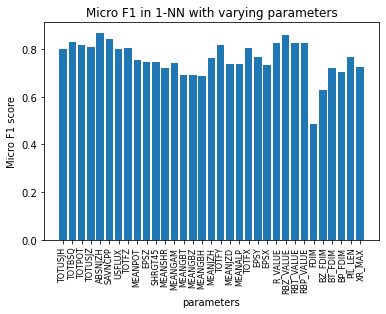

In [ ]:
keys_list = para_names
values_list = f1
zip_iterator = zip(para_names,f1)

dictionary = dict(zip_iterator)

print(dictionary)
import matplotlib.pyplot as plt

D = dictionary
plt.bar(*zip(*D.items()))
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(keys_list, rotation='vertical')
plt.xticks(fontsize=8)
plt.title('Micro F1 in 1-NN with varying parameters')
plt.xlabel('parameters')
plt.ylabel('Micro F1 score')
plt.show()

# top 10 highest parameters that achieved highest Micro f1 score

{'ABSNJZH': 0.8685121107266437, 'RBZ_VALUE': 0.8581314878892734, 'SAVNCPP': 0.842560553633218, 'TOTBSQ': 0.828719723183391, 'R_VALUE': 0.8269896193771626, 'RBT_VALUE': 0.8269896193771626, 'RBP_VALUE': 0.8235294117647058, 'TOTPOT': 0.8166089965397924, 'TOTFY': 0.8166089965397924, 'TOTUSJZ': 0.8079584775086506}


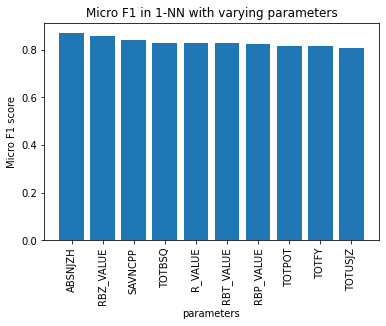

In [ ]:
from operator import itemgetter
zip_iterator = zip(para_names,f1)
dictionary = dict(zip_iterator)
res = dict(sorted(dictionary.items(), key = itemgetter(1), reverse = True)[:10])
print(res)

import matplotlib.pyplot as plt

D = res
plt.bar(*zip(*D.items()))
plt.xticks(rotation='vertical')
plt.xticks(fontsize=10)
plt.title('Micro F1 in 1-NN with varying parameters')
plt.xlabel('parameters')
plt.ylabel('Micro F1 score')
plt.show()

# get the index of top 10 important parameters

In [ ]:
para_nums = []
for i in range(33):
  para_nums.append(i)
zip_iterator = zip(para_nums,f1)
dictionary = dict(zip_iterator)
res = dict(sorted(dictionary.items(), key = itemgetter(1), reverse = True)[:10])
print(res)

{4: 0.8685121107266437, 24: 0.8581314878892734, 5: 0.842560553633218, 1: 0.828719723183391, 23: 0.8269896193771626, 25: 0.8269896193771626, 26: 0.8235294117647058, 2: 0.8166089965397924, 17: 0.8166089965397924, 3: 0.8079584775086506}


In [ ]:
keys = []
for key in res:
  keys.append(key)
print(keys)

[4, 24, 5, 1, 23, 25, 26, 2, 17, 3]


# select n features for multivariate time series classification

In [ ]:
#return the n_feature as input 
def feature_select_n(input,i):
  feature = input[:,i,:]
  return feature

# select top k features

In [ ]:
import time
times = []
top_k_accuracy = []
top_k_f1 = []
top_k_recall = []
top_k_precision = []
top_k_tss = []
for i in range(1,len(keys)+1):
  data = feature_select_n(inputs,keys[:i])
  X_train, X_test, y_train, y_test = data_prepare(data, labels)
  print(X_train.shape)
  stime = time.time()
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  time_consume = time.time() - stime
  times.append(time_consume)
  top_k_accuracy.append(accuracy_score(y_test,y_pred))
  top_k_f1.append(f1_score(y_test, y_pred, average='micro'))
  top_k_recall.append(recall_score(y_test, y_pred, average='micro'))
  top_k_precision.append(precision_score(y_test, y_pred, average='micro'))
  TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
  tss = (TP / (TP + FN)) - (FP / (FP + TN))
  top_k_tss.append(tss)

print("top_k_accuracy: ", top_k_accuracy) 
print("top_k_f1: ", top_k_f1)
print("top_k_recall: ", top_k_recall)
print("top_k_precision: ", top_k_precision)
print("top_k_tss: ", top_k_tss)
print("consumed time: ", times)

(1732, 1, 60)
(1732, 2, 60)
(1732, 3, 60)
(1732, 4, 60)
(1732, 5, 60)
(1732, 6, 60)
(1732, 7, 60)
(1732, 8, 60)
(1732, 9, 60)
(1732, 10, 60)
top_k_accuracy:  [0.8685121107266436, 0.8667820069204152, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.8166089965397924, 0.884083044982699, 0.884083044982699]
top_k_f1:  [0.8685121107266437, 0.8667820069204152, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.8166089965397924, 0.8840830449826991, 0.8840830449826991]
top_k_recall:  [0.8685121107266436, 0.8667820069204152, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.8166089965397924, 0.884083044982699, 0.884083044982699]
top_k_precision:  [0.8685121107266436, 0.8667820069204152, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.842560553633218, 0.8166089965397924, 0.884083044982699, 0.884083044982699]
top_k_tss:  [0.73624

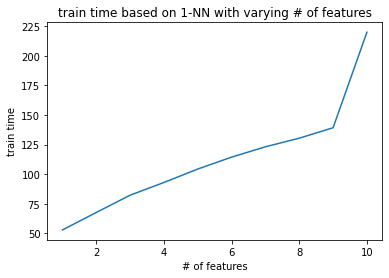

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.title('train time based on 1-NN with varying # of features')
plt.xlabel('# of features')
plt.ylabel('train time')
plt.plot(x,times)

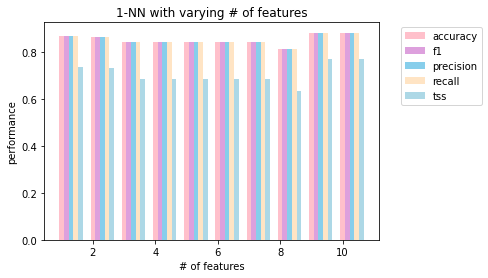

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [top_k_accuracy,
  top_k_f1,
  top_k_precision,
  top_k_recall,
  top_k_tss]

X = np.arange(1,11)
plt.bar(X + 0.00, data[0], color = 'pink', width = 0.15)
plt.bar(X + 0.15, data[1], color = 'plum', width = 0.15)
plt.bar(X + 0.30, data[2], color = 'skyblue', width = 0.15)
plt.bar(X + 0.45, data[3], color = 'bisque', width = 0.15)
plt.bar(X + 0.60, data[4], color = 'lightblue', width = 0.15)
plt.title('1-NN with varying # of features')
plt.xlabel('# of features')
plt.ylabel('performance')
plt.legend(["accuracy", "f1", "precision", "recall","tss"],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# multivariate-interval based (Canonical Interval Forest (CIF))


In [ ]:
! pip install catch22

  Created wheel for catch22: filename=catch22-0.2.0-cp37-cp37m-linux_x86_64.whl size=91759 sha256=dcd03eef42c79e9851bbaeb922345079b238adc2cc52958dba69d3f87819cbe2
  Stored in directory: /root/.cache/pip/wheels/48/f5/ea/0cda3b525b9735e55a967017abd66ce4275ce7c9cb29b35fa8
Successfully built catch22


In [ ]:
from sktime.classification.interval_based._cif import CanonicalIntervalForest

In [ ]:
import time
times = []
top_k_accuracy = []
top_k_f1 = []
top_k_recall = []
top_k_precision = []
top_k_tss = []
for i in range(1,len(keys)+1):
  data = feature_select_n(inputs,keys[:i])
  X_train, X_test, y_train, y_test = data_prepare(data, labels)
  print(X_train.shape)
  stime = time.time()
  cif_m = CanonicalIntervalForest(n_estimators=10, att_subsample_size=8, random_state=47)
  cif_m.fit(X_train, y_train)
  y_pred = cif_m.predict(X_test)
  time_consume = time.time() - stime
  times.append(time_consume)
  top_k_accuracy.append(accuracy_score(y_test,y_pred))
  top_k_f1.append(f1_score(y_test, y_pred, average='micro'))
  top_k_recall.append(recall_score(y_test, y_pred, average='micro'))
  top_k_precision.append(precision_score(y_test, y_pred, average='micro'))
  TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
  tss = (TP / (TP + FN)) - (FP / (FP + TN))
  top_k_tss.append(tss)

print("top_k_accuracy: ", top_k_accuracy) 
print("top_k_f1: ", top_k_f1)
print("top_k_recall: ", top_k_recall)
print("top_k_precision: ", top_k_precision)
print("top_k_tss: ", top_k_tss)
print("consumed time: ", times)

(1732, 1, 60)
(1732, 2, 60)
(1732, 3, 60)
(1732, 4, 60)
(1732, 5, 60)
(1732, 6, 60)
(1732, 7, 60)
(1732, 8, 60)
(1732, 9, 60)
(1732, 10, 60)
top_k_accuracy:  [0.8166089965397924, 0.8321799307958477, 0.8131487889273357, 0.8131487889273357, 0.7785467128027682, 0.7993079584775087, 0.8044982698961938, 0.7854671280276817, 0.7768166089965398, 0.7768166089965398]
top_k_f1:  [0.8166089965397924, 0.8321799307958477, 0.8131487889273357, 0.8131487889273357, 0.7785467128027682, 0.7993079584775086, 0.8044982698961937, 0.7854671280276816, 0.7768166089965398, 0.7768166089965398]
top_k_recall:  [0.8166089965397924, 0.8321799307958477, 0.8131487889273357, 0.8131487889273357, 0.7785467128027682, 0.7993079584775087, 0.8044982698961938, 0.7854671280276817, 0.7768166089965398, 0.7768166089965398]
top_k_precision:  [0.8166089965397924, 0.8321799307958477, 0.8131487889273357, 0.8131487889273357, 0.7785467128027682, 0.7993079584775087, 0.8044982698961938, 0.7854671280276817, 0.7768166089965398, 0.776816608996

In [ ]:
cif = [0.8322, 0.8322,0.8322, 0.8322, 0.6667, 8.9839]

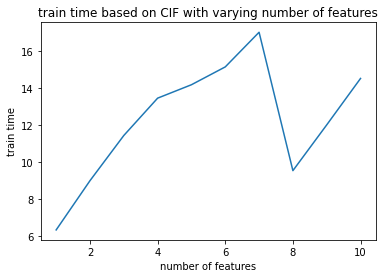

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.title('train time based on CIF with varying number of features')
plt.xlabel('number of features')
plt.ylabel('train time')
plt.plot(x,times)

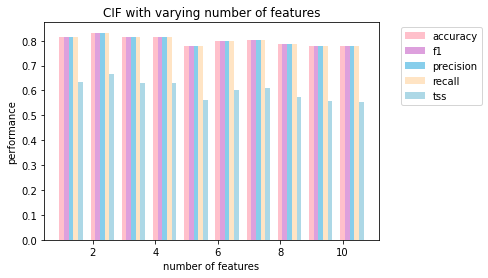

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [top_k_accuracy,
  top_k_f1,
  top_k_precision,
  top_k_recall,
  top_k_tss]

X = np.arange(1,11)
plt.bar(X + 0.00, data[0], color = 'pink', width = 0.15)
plt.bar(X + 0.15, data[1], color = 'plum', width = 0.15)
plt.bar(X + 0.30, data[2], color = 'skyblue', width = 0.15)
plt.bar(X + 0.45, data[3], color = 'bisque', width = 0.15)
plt.bar(X + 0.60, data[4], color = 'lightblue', width = 0.15)
plt.title('CIF with varying number of features')
plt.xlabel('number of features')
plt.ylabel('performance')
plt.legend(["accuracy", "f1", "precision", "recall","tss"],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Shaplet-based (Multiple representation sequence learner (MrSEQL))

In [ ]:
from sktime.classification.shapelet_based import MrSEQLClassifier

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
import time
times = []
top_k_accuracy = []
top_k_f1 = []
top_k_recall = []
top_k_precision = []
top_k_tss = []
for i in range(1,len(keys)+1):
  data = feature_select_n(inputs,keys[:i])
  X_train, X_test, y_train, y_test = data_prepare(data, labels)
  print(X_train.shape)
  stime = time.time()
  MrSEQL = MrSEQLClassifier()
  MrSEQL.fit(X_train, y_train)
  y_pred = MrSEQL.predict(X_test)
  time_consume = time.time() - stime
  times.append(time_consume)
  top_k_accuracy.append(accuracy_score(y_test,y_pred))
  top_k_f1.append(f1_score(y_test, y_pred, average='micro'))
  top_k_recall.append(recall_score(y_test, y_pred, average='micro'))
  top_k_precision.append(precision_score(y_test, y_pred, average='micro'))
  TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
  tss = (TP / (TP + FN)) - (FP / (FP + TN))
  top_k_tss.append(tss)

print("top_k_accuracy: ", top_k_accuracy) 
print("top_k_f1: ", top_k_f1)
print("top_k_recall: ", top_k_recall)
print("top_k_precision: ", top_k_precision)
print("top_k_tss: ", top_k_tss)
print("consumed time: ", times)

(1732, 1, 60)
(1732, 2, 60)
(1732, 3, 60)
(1732, 4, 60)
(1732, 5, 60)
(1732, 6, 60)
(1732, 7, 60)
(1732, 8, 60)
(1732, 9, 60)
(1732, 10, 60)
top_k_accuracy:  [0.754325259515571, 0.8235294117647058, 0.7681660899653979, 0.801038062283737, 0.8131487889273357, 0.8166089965397924, 0.8269896193771626, 0.801038062283737, 0.7958477508650519, 0.8062283737024222]
top_k_f1:  [0.754325259515571, 0.8235294117647058, 0.7681660899653979, 0.8010380622837369, 0.8131487889273357, 0.8166089965397924, 0.8269896193771626, 0.8010380622837369, 0.7958477508650519, 0.8062283737024222]
top_k_recall:  [0.754325259515571, 0.8235294117647058, 0.7681660899653979, 0.801038062283737, 0.8131487889273357, 0.8166089965397924, 0.8269896193771626, 0.801038062283737, 0.7958477508650519, 0.8062283737024222]
top_k_precision:  [0.754325259515571, 0.8235294117647058, 0.7681660899653979, 0.801038062283737, 0.8131487889273357, 0.8166089965397924, 0.8269896193771626, 0.801038062283737, 0.7958477508650519, 0.8062283737024222]
top_

In [ ]:
mrseql = [0.8235, 0.8235, 0.8235, 0.8235, 0.6479, 390]

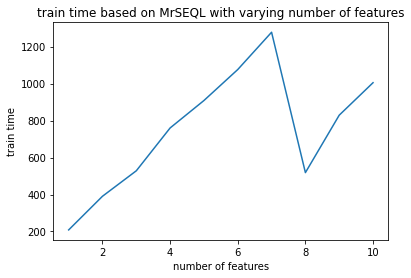

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.title('train time based on MrSEQL with varying number of features')
plt.xlabel('number of features')
plt.ylabel('train time')
plt.plot(x,times)

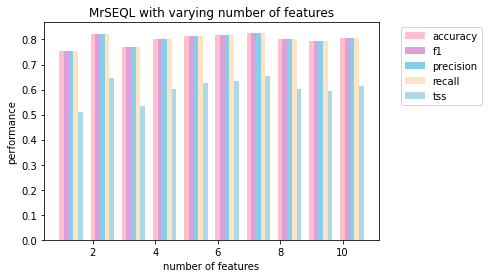

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [top_k_accuracy,
  top_k_f1,
  top_k_precision,
  top_k_recall,
  top_k_tss]

X = np.arange(1,11)
plt.bar(X + 0.00, data[0], color = 'pink', width = 0.15)
plt.bar(X + 0.15, data[1], color = 'plum', width = 0.15)
plt.bar(X + 0.30, data[2], color = 'skyblue', width = 0.15)
plt.bar(X + 0.45, data[3], color = 'bisque', width = 0.15)
plt.bar(X + 0.60, data[4], color = 'lightblue', width = 0.15)
plt.title('MrSEQL with varying number of features')
plt.xlabel('number of features')
plt.ylabel('performance')
plt.legend(["accuracy", "f1", "precision", "recall","tss"],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Dictionat-based (Word extraction for time series classification + Multivariate Unsupervised symbols and Derivatives (WEASEL + MUSE ))

In [ ]:
from sktime.classification.dictionary_based import MUSE, WEASEL

In [ ]:
import time
times = []
top_k_accuracy = []
top_k_f1 = []
top_k_recall = []
top_k_precision = []
top_k_tss = []
data = feature_select(inputs,4)
X_train, X_test, y_train, y_test = data_prepare(data, labels)
print(X_train.shape)
stime = time.time()
weasel = WEASEL(binning_strategy="equi-depth", anova=False, random_state=47)
weasel.fit(X_train, y_train)
y_pred = weasel.predict(X_test)
time_consume = time.time() - stime
times.append(time_consume)
top_k_accuracy.append(accuracy_score(y_test,y_pred))
top_k_f1.append(f1_score(y_test, y_pred, average='micro'))
top_k_recall.append(recall_score(y_test, y_pred, average='micro'))
top_k_precision.append(precision_score(y_test, y_pred, average='micro'))
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
tss = (TP / (TP + FN)) - (FP / (FP + TN))
top_k_tss.append(tss)

print("top_k_accuracy: ", top_k_accuracy) 
print("top_k_f1: ", top_k_f1)
print("top_k_recall: ", top_k_recall)
print("top_k_precision: ", top_k_precision)
print("top_k_tss: ", top_k_tss)
print("consumed time: ", times)

(1732, 1, 60)
top_k_accuracy:  [0.870242214532872]
top_k_f1:  [0.8702422145328719]
top_k_recall:  [0.870242214532872]
top_k_precision:  [0.870242214532872]
top_k_tss:  [0.7426818601195825]
consumed time:  [82.5601167678833]


In [ ]:
import time
for i in range(2,len(keys)+1):
  data = feature_select_n(inputs,keys[:i])
  X_train, X_test, y_train, y_test = data_prepare(data, labels)
  print(X_train.shape)
  stime = time.time()
  muse = MUSE()
  muse.fit(X_train, y_train)
  y_pred = muse.predict(X_test)
  time_consume = time.time() - stime
  times.append(time_consume)
  top_k_accuracy.append(accuracy_score(y_test,y_pred))
  top_k_f1.append(f1_score(y_test, y_pred, average='micro'))
  top_k_recall.append(recall_score(y_test, y_pred, average='micro'))
  top_k_precision.append(precision_score(y_test, y_pred, average='micro'))
  TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
  tss = (TP / (TP + FN)) - (FP / (FP + TN))
  top_k_tss.append(tss)

print("top_k_accuracy: ", top_k_accuracy) 
print("top_k_f1: ", top_k_f1)
print("top_k_recall: ", top_k_recall)
print("top_k_precision: ", top_k_precision)
print("top_k_tss: ", top_k_tss)
print("consumed time: ", times)

(1732, 2, 60)
(1732, 3, 60)
(1732, 4, 60)
(1732, 5, 60)
(1732, 6, 60)
(1732, 7, 60)
(1732, 8, 60)
(1732, 9, 60)
(1732, 10, 60)
top_k_accuracy:  [0.870242214532872, 0.8927335640138409, 0.8442906574394463, 0.8581314878892734, 0.8598615916955017, 0.8477508650519031, 0.842560553633218, 0.8114186851211073, 0.8269896193771626, 0.8321799307958477]
top_k_f1:  [0.8702422145328719, 0.8927335640138409, 0.8442906574394463, 0.8581314878892734, 0.8598615916955017, 0.8477508650519031, 0.842560553633218, 0.8114186851211074, 0.8269896193771626, 0.8321799307958477]
top_k_recall:  [0.870242214532872, 0.8927335640138409, 0.8442906574394463, 0.8581314878892734, 0.8598615916955017, 0.8477508650519031, 0.842560553633218, 0.8114186851211073, 0.8269896193771626, 0.8321799307958477]
top_k_precision:  [0.870242214532872, 0.8927335640138409, 0.8442906574394463, 0.8581314878892734, 0.8598615916955017, 0.8477508650519031, 0.842560553633218, 0.8114186851211073, 0.8269896193771626, 0.8321799307958477]
top_k_tss:  [0.

In [ ]:
weasel_muse =[0.8927, 0.8927, 0.8927, 0.8927, 0.7870, 349]

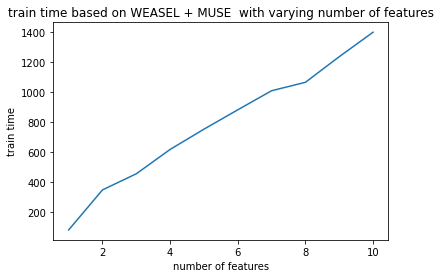

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.title('train time based on WEASEL + MUSE  with varying number of features')
plt.xlabel('number of features')
plt.ylabel('train time')
plt.plot(x,times)

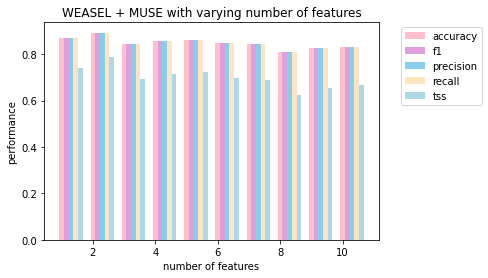

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [top_k_accuracy,
  top_k_f1,
  top_k_precision,
  top_k_recall,
  top_k_tss]

X = np.arange(1,11)
plt.bar(X + 0.00, data[0], color = 'pink', width = 0.15)
plt.bar(X + 0.15, data[1], color = 'plum', width = 0.15)
plt.bar(X + 0.30, data[2], color = 'skyblue', width = 0.15)
plt.bar(X + 0.45, data[3], color = 'bisque', width = 0.15)
plt.bar(X + 0.60, data[4], color = 'lightblue', width = 0.15)
plt.title('WEASEL + MUSE with varying number of features')
plt.xlabel('number of features')
plt.ylabel('performance')
plt.legend(["accuracy", "f1", "precision", "recall","tss"],bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
cif

[0.8322, 0.8322, 0.8322, 0.8322, 0.6667, 8.9839]

In [ ]:
mrseql

[0.8235, 0.8235, 0.8235, 0.8235, 0.6479, 390]

In [ ]:
weasel_muse

[0.8927, 0.8927, 0.8927, 0.8927, 0.787, 349]

In [ ]:
accuracy = [0.8322, 0.8235, 0.8927]
precision = [0.8322, 0.8235, 0.8927]
recall = [0.8322, 0.8235, 0.8927]
f1 = [0.8322, 0.8235, 0.8927]
tss = [0.6667, 0.6479, 0.787]
time = [8.9839, 390, 349]

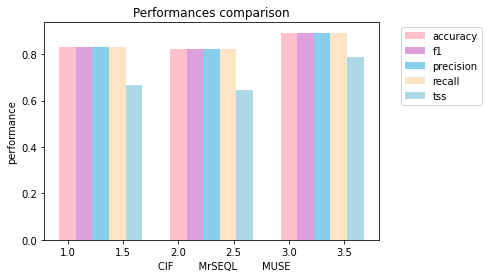

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [accuracy,
  precision,
  recall,
  f1,
  tss,
  time]

X = np.arange(1,4)
plt.bar(X + 0.00, data[0], color = 'pink', width = 0.15)
plt.bar(X + 0.15, data[1], color = 'plum', width = 0.15)
plt.bar(X + 0.30, data[2], color = 'skyblue', width = 0.15)
plt.bar(X + 0.45, data[3], color = 'bisque', width = 0.15)
plt.bar(X + 0.60, data[4], color = 'lightblue', width = 0.15)
# plt.bar(X + 0.75, data[5], color = 'black', width = 0.15)

plt.title('Performances comparison')
plt.xlabel("        CIF        MrSEQL        MUSE")
plt.ylabel('performance')
plt.legend(["accuracy", "f1", "precision", "recall","tss"],bbox_to_anchor=(1.05, 1.0), loc='upper left')

Text(0, 0.5, 'training time')

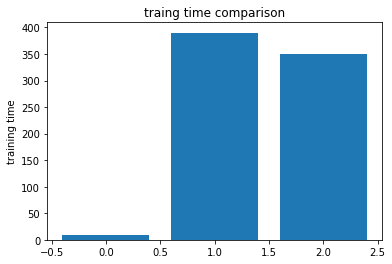

In [ ]:
time = [8.9839, 390, 349]
x = [0,1,2]
plt.bar(x,time)
plt.title("traing time comparison")
plt.ylabel("training time")